In [ ]:
import pandas as pd
import numpy as np
import requests
import io

In [ ]:
import gdown
import pandas as pd

#train
file_id = '1J3bBinxCrEbrthsmRj-HEIQzWmV25-HU'
url = f'https://drive.google.com/uc?id={file_id}'

# Download the file
output_file = 'train.csv'
gdown.download(url, output=output_file, quiet=False)

# Read the downloaded CSV file into a pandas DataFrame
train = pd.read_csv(output_file)

#test
file_id1 = '1E98UeUq2lrajX2f5NOlZUdQsP9_m-0A8'
url1 = f'https://drive.google.com/uc?id={file_id1}'

# Download the file
output_file1 = 'test.csv'
gdown.download(url1, output=output_file1, quiet=False)

# Read the downloaded CSV file into a pandas DataFrame
test = pd.read_csv(output_file1)


AttributeError: 'NoneType' object has no attribute 'groups'

In [ ]:
train = train[['distance', 'consume', 'speed', 'temp_inside', 'temp_outside', 'gas_type', 'AC', 'rain', 'sun']]
test = test[['distance', 'consume', 'speed', 'temp_inside', 'temp_outside', 'gas_type', 'AC', 'rain', 'sun']]


In [ ]:
train = pd.get_dummies(train, columns=['gas_type', 'AC', 'rain', 'sun'],drop_first=True)
test = pd.get_dummies(test, columns=['gas_type', 'AC', 'rain', 'sun'],drop_first=True)


In [ ]:
x_train = train[['distance', 'speed', 'temp_inside', 'temp_outside', 'gas_type_SP98', 'AC_1', 'rain_1', 'sun_1']]
y_train = train[['consume']]

x_test = test[['distance', 'speed', 'temp_inside', 'temp_outside', 'gas_type_SP98', 'AC_1', 'rain_1', 'sun_1']]
y_test = test[['consume']]


In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       272 non-null    float64
 1   speed          272 non-null    int64  
 2   temp_inside    272 non-null    float64
 3   temp_outside   272 non-null    int64  
 4   gas_type_SP98  272 non-null    uint8  
 5   AC_1           272 non-null    uint8  
 6   rain_1         272 non-null    uint8  
 7   sun_1          272 non-null    uint8  
dtypes: float64(2), int64(2), uint8(4)
memory usage: 9.7 KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       116 non-null    float64
 1   consume        116 non-null    float64
 2   speed          116 non-null    int64  
 3   temp_inside    116 non-null    float64
 4   temp_outside   116 non-null    int64  
 5   gas_type_SP98  116 non-null    uint8  
 6   AC_1           116 non-null    uint8  
 7   rain_1         116 non-null    uint8  
 8   sun_1          116 non-null    uint8  
dtypes: float64(3), int64(2), uint8(4)
memory usage: 5.1 KB


**Multiple Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


linear_reg1=LinearRegression()
linear_reg1.fit(x_train,y_train)

y_test_pred = linear_reg1.predict(x_test)
y_train_pred = linear_reg1.predict(x_train)

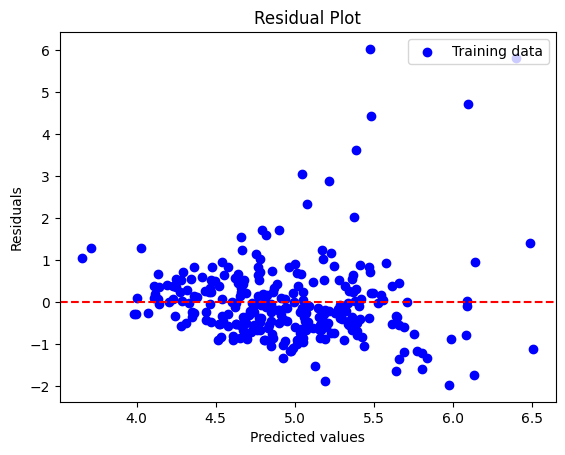

In [ ]:
import matplotlib.pyplot as plt

# Calculate residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

# Plot residuals against predicted values for training data
plt.scatter(y_train_pred, train_residuals, c='blue', marker='o', label='Training data')

# Plot a horizontal line at y=0
plt.axhline(y=0, color='red', linestyle='--')

# Label the axes
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend(loc='upper right')

# Show plot
plt.show()


In [ ]:
#Assumption of Independent Errors

#Durbin-Watson test
#For this test, a value of 2, or close to it, is ideal. The statistical value ranges between 0-4 where a value closer to 0 is more evidence for
# positive serial correlation and a value closer to 4 is more evidence for negative serial correlation.

import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from scipy import stats
from statsmodels.compat import lzip
import statsmodels
import matplotlib.pyplot as plt

statsmodels.stats.stattools.durbin_watson(train_residuals)

#Independent

array([2.08160736])

ShapiroResult(statistic=0.8075265884399414, pvalue=1.1894085449001026e-17)


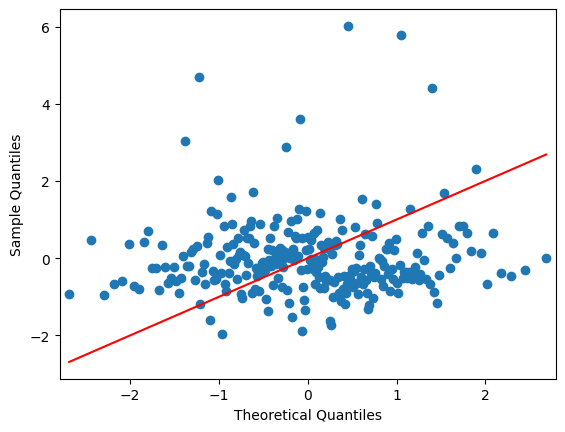

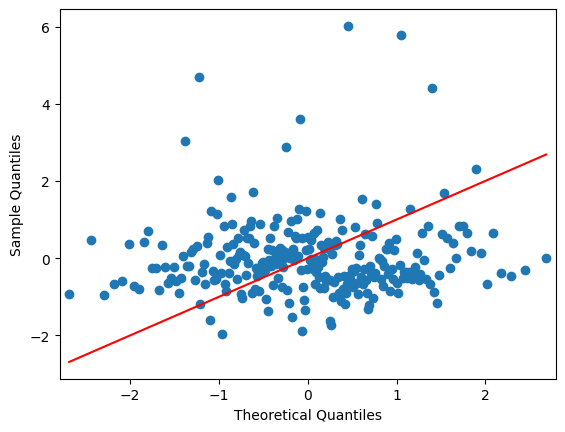

In [ ]:
#Assumption of Normality of the Residuals

from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot

print(shapiro(train_residuals))
qqplot(train_residuals, line='s')

#residuals are not normally distributed.

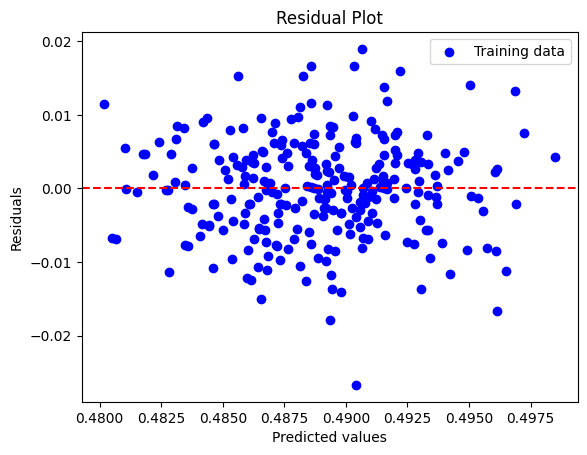

In [ ]:
#BoxCox transformation
#log and sqrt didnt work

from scipy.stats import boxcox

y_train_transformed, lambda_value1 = boxcox(y_train['consume'])
y_test_transformed, lambda_value2 = boxcox(y_test['consume'])

linear_reg1=LinearRegression()
linear_reg1.fit(x_train,y_train_transformed)

y_test_pred_transformed = linear_reg1.predict(x_test)
y_train_pred_transformed = linear_reg1.predict(x_train)

# Calculate residuals
train_residuals_transformed = y_train_transformed - y_train_pred_transformed
test_residuals_transformed = y_test_transformed - y_test_pred_transformed

# Plot residuals against predicted values for training data
plt.scatter(y_train_pred_transformed, train_residuals_transformed, c='blue', marker='o', label='Training data')

# Plot a horizontal line at y=0
plt.axhline(y=0, color='red', linestyle='--')

# Label the axes
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend(loc='upper right')

# Show plot
plt.show()



In [ ]:
statsmodels.stats.stattools.durbin_watson(train_residuals_transformed)


2.0131027157988157

ShapiroResult(statistic=0.9938125014305115, pvalue=0.32888951897621155)


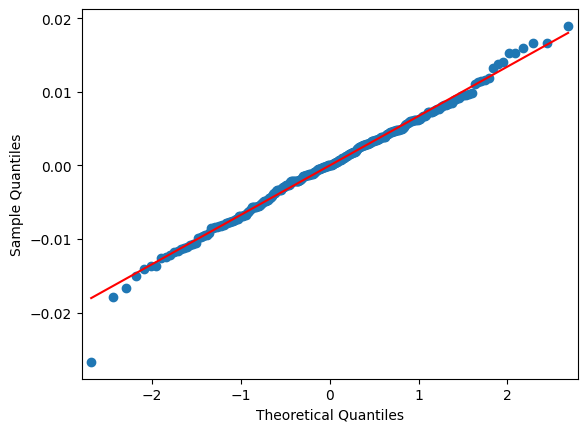

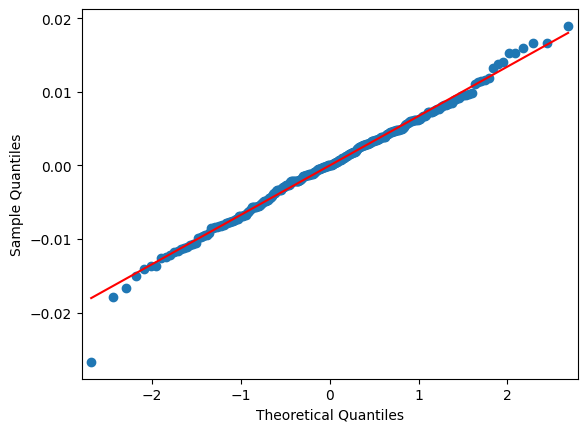

In [ ]:
print(shapiro(train_residuals_transformed))
qqplot(train_residuals_transformed, line='s')

In [ ]:
#Assumption of Homoscedasticity

#Bruesch-Pagan, Cook-Weisberg test, or White general test can be used

#Bruesch-Pagan
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

x_train_with_constant = sm.add_constant(x_train)
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(train_residuals_transformed, x_train_with_constant)
print("Breusch-Pagan test p-value:", lm_p_value)

#homoscedasticity is not violated

Breusch-Pagan test p-value: 0.07575783729698875


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train_transformed, y_train_pred_transformed)
mse_test = mean_squared_error(y_test_transformed, y_test_pred_transformed)

# Calculate Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Calculate Mean Absolute Error (MAE)
mae_train = mean_absolute_error(y_train_transformed, y_train_pred_transformed)
mae_test = mean_absolute_error(y_test_transformed, y_test_pred_transformed)

# Calculate R-squared value
r_squared_train = r2_score(y_train_transformed, y_train_pred_transformed)
r_squared_test = r2_score(y_test_transformed, y_test_pred_transformed)


print("Mean Squared Error (MSE train):", mse_train)
print("Mean Squared Error (MSE test):", mse_test)

print("Root Mean Squared Error (RMSE train):", rmse_train)
print("Root Mean Squared Error (RMSE test):", rmse_test)

print("Mean Absolute Error (MAE train):", mae_train)
print("Mean Absolute Error (MAE test):", mae_test)

print("R-squared value train:", r_squared_train)
print("R-squared value test:", r_squared_test)



Mean Squared Error (MSE train): 4.522493979649815e-05
Mean Squared Error (MSE test): 0.03557541590686706
Root Mean Squared Error (RMSE train): 0.006724949055308758
Root Mean Squared Error (RMSE test): 0.1886144636735663
Mean Absolute Error (MAE train): 0.005237279772872629
Mean Absolute Error (MAE test): 0.18766488710964319
R-squared value train: 0.21700379131805447
R-squared value test: -83.03416783803901


**Mahalanabois Distance**

In [ ]:
x=train
data=train[['speed', 'distance', 'temp_outside', 'temp_inside', 'consume']]
x - np.mean(data, axis=0)


,AC_1,consume,distance,gas_type_SP98,rain_1,speed,sun_1,temp_inside,temp_outside
0,NaN,-1.052206,-2.538235,NaN,NaN,-7.106618,NaN,0.027574,4.466912
1,NaN,0.147794,4.961765,NaN,NaN,15.893382,NaN,-0.472426,0.466912
2,NaN,-0.852206,-7.938235,NaN,NaN,-5.106618,NaN,-0.472426,-1.533088
3,NaN,-0.552206,-7.938235,NaN,NaN,-9.106618,NaN,0.527574,-3.533088
4,NaN,-0.352206,-8.038235,NaN,NaN,-5.106618,NaN,-0.472426,-5.533088
...,...,...,...,...,...,...,...,...,...
267,NaN,0.247794,-7.438235,NaN,NaN,12.893382,NaN,0.527574,-1.533088
268,NaN,-0.652206,-8.438235,NaN,NaN,-4.106618,NaN,0.027574,5.466912
269,NaN,-0.352206,-6.938235,NaN,NaN,-20.106618,NaN,0.527574,0.466912
270,NaN,-0.352206,-14.538235,NaN,NaN,-4.106618,NaN,0.527574,-3.533088


In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.stats import chi2

def mahalanobis(x=None, data=None, cov=None):
    """Compute the Mahalanobis Distance between each row of x and the data."""
    x_minus_mu = x - np.mean(data, axis=0)  # Compute mean for each feature
    if cov is None:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return np.sqrt(mahal.diagonal())  # Return the squared root of the diagonal elements

# Assuming 'train' is your DataFrame
df_x = train[['speed', 'distance', 'temp_outside', 'temp_inside', 'consume']]

# Calculate Mahalanobis distance
df_x['mahala'] = mahalanobis(x=df_x, data=train[['speed', 'distance', 'temp_outside', 'temp_inside', 'consume']])

# Compute the P-Values
df_x['p_value'] = 1 - chi2.cdf(df_x['mahala'], 5)

# Extract extreme values
ex = df_x.loc[df_x.p_value < 0.05]

# Plot Mahalanobis Distance vs. Data Point
plt.scatter(range(len(df_x)), df_x['mahala'], label='Mahalanobis Distance')
plt.scatter(ex.index, ex['mahala'], color='red', label='Extreme Values')4

# Set a threshold line (you can adjust this based on your requirements)
threshold = chi2.ppf(0.95, 5)
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')

# Add legend and labels
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Data Point')
plt.ylabel('Mahalanobis Distance')

# Show the plot
plt.show()


In [ ]:
from sklearn.decomposition import PCA
import numpy as np


# Select the features for PCA
X = train[['speed', 'distance', 'temp_outside', 'temp_inside', 'consume']]

# Standardize the features
X_standardized = (X - X.mean()) / X.std()

# Initialize PCA
pca = PCA(n_components=2)  # Choose the number of principal components

# Fit PCA
pca.fit(X_standardized)

# Transform data to principal components
X_pca = pca.transform(X_standardized)

# Calculate the squared reconstruction error (squared distance from original data)
reconstruction_error = np.square(X_standardized - pca.inverse_transform(X_pca)).sum(axis=1)

# Set a threshold for outlier detection (e.g., 95th percentile of reconstruction errors)
threshold = np.percentile(reconstruction_error, 95)

# Identify outliers based on the threshold
outliers = train[reconstruction_error > threshold]

# Display outliers
print(len(outliers))


14


In [ ]:
cleaned_df

,distance,consume,speed,temp_inside,temp_outside,gas_type_SP98,AC_1,rain_1,sun_1
0,17.2,3.9,35,22.0,16,0,0,0,0
1,24.7,5.1,58,21.5,12,0,0,0,0
2,11.8,4.1,37,21.5,10,0,0,0,0
3,11.8,4.4,33,22.5,8,0,0,0,0
4,11.7,4.6,37,21.5,6,0,0,0,0
...,...,...,...,...,...,...,...,...,...
267,12.3,5.2,55,22.5,10,1,0,0,0
268,11.3,4.3,38,22.0,17,1,0,0,0
269,12.8,4.6,22,22.5,12,1,0,0,0
270,5.2,4.6,38,22.5,8,1,0,0,0


In [ ]:
from sklearn.linear_model import LinearRegression

# Remove outliers identified using PCA
cleaned_df = train[reconstruction_error <= threshold]

# Fit a linear regression model to the cleaned dataset
X_cleaned = cleaned_df[['distance', 'speed', 'temp_inside', 'temp_outside', 'gas_type_SP98', 'AC_1', 'rain_1', 'sun_1']]
y_cleaned = cleaned_df[['consume']]

y_train_transformed, lambda_value1 = boxcox(y_cleaned['consume'])
y_test_transformed, lambda_value2 = boxcox(y_test['consume'])

linear_reg1=LinearRegression()
linear_reg1.fit(X_cleaned,y_train_transformed)

y_test_pred_transformed = linear_reg1.predict(x_test)
y_train_pred_transformed = linear_reg1.predict(X_cleaned)

# Calculate residuals
train_residuals_transformed = y_train_transformed - y_train_pred_transformed
test_residuals_transformed = y_test_transformed - y_test_pred_transformed



In [ ]:
print(shapiro(train_residuals_transformed))


ShapiroResult(statistic=0.993142306804657, pvalue=0.2833620309829712)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train_transformed, y_train_pred_transformed)
mse_test = mean_squared_error(y_test_transformed, y_test_pred_transformed)

# Calculate Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Calculate Mean Absolute Error (MAE)
mae_train = mean_absolute_error(y_train_transformed, y_train_pred_transformed)
mae_test = mean_absolute_error(y_test_transformed, y_test_pred_transformed)

# Calculate R-squared value
r_squared_train = r2_score(y_train_transformed, y_train_pred_transformed)
r_squared_test = r2_score(y_test_transformed, y_test_pred_transformed)


print("Mean Squared Error (MSE train):", mse_train)
print("Mean Squared Error (MSE test):", mse_test)

print("Root Mean Squared Error (RMSE train):", rmse_train)
print("Root Mean Squared Error (RMSE test):", rmse_test)

print("Mean Absolute Error (MAE train):", mae_train)
print("Mean Absolute Error (MAE test):", mae_test)

print("R-squared value train:", r_squared_train)
print("R-squared value test:", r_squared_test)



Mean Squared Error (MSE train): 0.00024996040822214367
Mean Squared Error (MSE test): 0.00100928200634089
Root Mean Squared Error (RMSE train): 0.015810136249322575
Root Mean Squared Error (RMSE test): 0.03176919901950457
Mean Absolute Error (MAE train): 0.01251693232707699
Mean Absolute Error (MAE test): 0.027001565000576922
R-squared value train: 0.23339283151250434
R-squared value test: -1.38406695620364


**Elastic Net**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet()

# Define the grid of parameters to search
param_grid = {
    'alpha': np.arange(0,1,0.01),
    'l1_ratio': np.arange(0,1,0.01)
}

# Perform grid search with cross-validation
model = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=5)
model.fit(x_train, y_train)

In [ ]:
best_alpha = model.best_params_['alpha']
best_l1_ratio = model.best_params_['l1_ratio']

print("Best alpha:", best_alpha)
print("Best l1_ratio:", best_l1_ratio)

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

y_train_pred=y_train_pred.reshape(-1,1)
y_test_pred=y_test_pred.reshape(-1,1)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Calculate Mean Absolute Error (MAE)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate R-squared value
r_squared_train = r2_score(y_train, y_train_pred)
r_squared_test = r2_score(y_test, y_test_pred)


print("Mean Squared Error (MSE train):", mse_train)
print("Mean Squared Error (MSE test):", mse_test)

print("Root Mean Squared Error (RMSE train):", rmse_train)
print("Root Mean Squared Error (RMSE test):", rmse_test)

print("Mean Absolute Error (MAE train):", mae_train)
print("Mean Absolute Error (MAE test):", mae_test)

print("R-squared value train:", r_squared_train)
print("R-squared value test:", r_squared_test)

Mean Squared Error (MSE train): 1.0224038274389764
Mean Squared Error (MSE test): 0.47408979522505373
Root Mean Squared Error (RMSE train): 1.0111398654187147
Root Mean Squared Error (RMSE test): 0.6885417890186868
Mean Absolute Error (MAE train): 0.6640429378621137
Mean Absolute Error (MAE test): 0.5530482445810561
R-squared value train: 0.18341871672319987
R-squared value test: 0.22650140837738897


**XGBoost**

In [ ]:
from xgboost import XGBRegressor

xgb1=XGBRegressor()

In [ ]:
xgb1 = XGBRegressor(
 learning_rate =0.029,
 n_estimators=153,
 max_depth=7,
 min_child_weight=3,
 gamma=0,
 subsample=0.75,
 colsample_bytree=0.8,
 reg_alpha=2.1,
 reg_lambda= 1,
 seed=27)

xgb1.fit(x_train,y_train)



Model Report
Mean Squared Error (MSE train): 0.18307650738792708
Mean Squared Error (MSE test): 0.38890755190924037
Root Mean Squared Error (RMSE train): 0.3765098839207586
Root Mean Squared Error (RMSE test): 0.18861445152611891
Mean Absolute Error (MAE train): 0.305762538839789
Mean Absolute Error (MAE test): 0.3826967066731946
R-squared value train: 0.8537790593809265
R-squared value test: 0.36548002782807454


array([0.5023754 , 0.107411  , 0.07113084, 0.14414836, 0.02381293,
       0.03510349, 0.10445182, 0.01156611], dtype=float32)

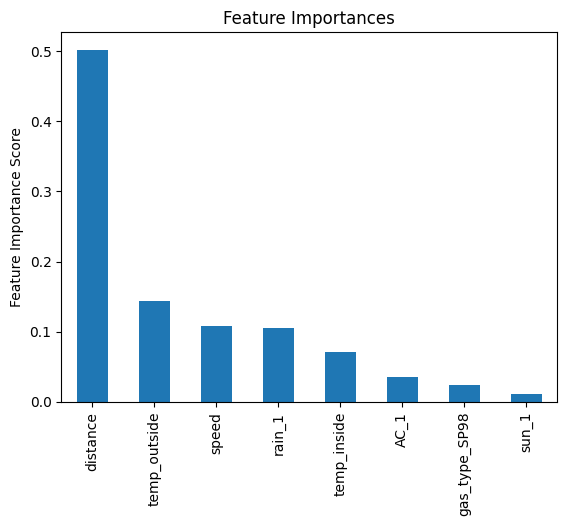

In [ ]:
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

def modelfit(alg, train, x_train, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):

    # Fit the algorithm on the data
    alg.fit(x_train, y_train, eval_metric='rmse')

    # Predict training set
    y_train_pred = alg.predict(x_train)
    y_test_pred = alg.predict(x_test)

    # Print model report
    print("\nModel Report")

    print("Mean Squared Error (MSE train):", mean_squared_error(y_train, y_train_pred))
    print("Mean Squared Error (MSE test):", mean_squared_error(y_test, y_test_pred))

    print("Root Mean Squared Error (RMSE train):", np.sqrt(mse_train))
    print("Root Mean Squared Error (RMSE test):", np.sqrt(mse_test))

    print("Mean Absolute Error (MAE train):", mean_absolute_error(y_train, y_train_pred))
    print("Mean Absolute Error (MAE test):", mean_absolute_error(y_test, y_test_pred))

    print("R-squared value train:", r2_score(y_train, y_train_pred))
    print("R-squared value test:", r2_score(y_test, y_test_pred))

    feat_imp = pd.Series(alg.feature_importances_, index=x_train.columns).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

# Assuming xgb1 is your XGBoost regressor and 'train' is your training dataset
modelfit(xgb1, train, x_train) # 'predictors' should be the list of feature columns you are using for prediction
feature_importances = xgb1.feature_importances_
feature_importances



**XGB with Bootstrapping**

In [ ]:
.0

In [ ]:
param_test1 = {
 'reg_lambda':[1e-5,1e-2,0.1,1,2,3,4,10],
}

gsearch1 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.029, n_estimators=153, max_depth=7,
 min_child_weight=3, gamma=0, subsample=0.75, colsample_bytree=0.8, nthread=4, scale_pos_weight=1, seed=27),
 param_grid = param_test1, n_jobs=4,cv=5)
gsearch1.fit(x_train,y_train)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

NameError: name 'GridSearchCV' is not defined

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Calculate Mean Absolute Error (MAE)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate R-squared value
r_squared_train = r2_score(y_train, y_train_pred)
r_squared_test = r2_score(y_test, y_test_pred)


print("Mean Squared Error (MSE train):", mse_train)
print("Mean Squared Error (MSE test):", mse_test)

print("Root Mean Squared Error (RMSE train):", rmse_train)
print("Root Mean Squared Error (RMSE test):", rmse_test)

print("Mean Absolute Error (MAE train):", mae_train)
print("Mean Absolute Error (MAE test):", mae_test)

print("R-squared value train:", r_squared_train)
print("R-squared value test:", r_squared_test)

Mean Squared Error (MSE train): 1.0735018334926345e-06
Mean Squared Error (MSE test): 0.4730984864271566
Root Mean Squared Error (RMSE train): 0.0010360993357263746
Root Mean Squared Error (RMSE test): 0.6878215512959422
Mean Absolute Error (MAE train): 0.0007077241645139999
Mean Absolute Error (MAE test): 0.42645803155570194
R-squared value train: 0.9999991426073717
R-squared value test: 0.22811877278126225


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf1 = RandomForestRegressor(
    max_features='auto',
    n_estimators=120,
    max_depth=15,
    min_samples_split=7,
    max_leaf_nodes=41,
    max_samples=116,
    min_samples_leaf=1,
    bootstrap=True,
    random_state=27)


<ipython-input-8-64797b11723e>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_depth=15, max_features='auto', max_leaf_nodes=41,
                      max_samples=116, min_samples_split=7, n_estimators=120,
                      random_state=27)

Model Report
Mean Squared Error (MSE train): 0.24399365302605105
Mean Squared Error (MSE test): 0.3939081415419995
Root Mean Squared Error (RMSE train): 0.49395713683076903
Root Mean Squared Error (RMSE test): 0.627621017447631
Mean Absolute Error (MAE train): 0.3396762163915196
Mean Absolute Error (MAE test): 0.40048576975786027
R-squared value train: 0.8051252890959086
R-squared value test: 0.3573213433822606
[0.68859655 0.12462708 0.0180543  0.13580064 0.00620496 0.00748317
 0.01789142 0.00134187]


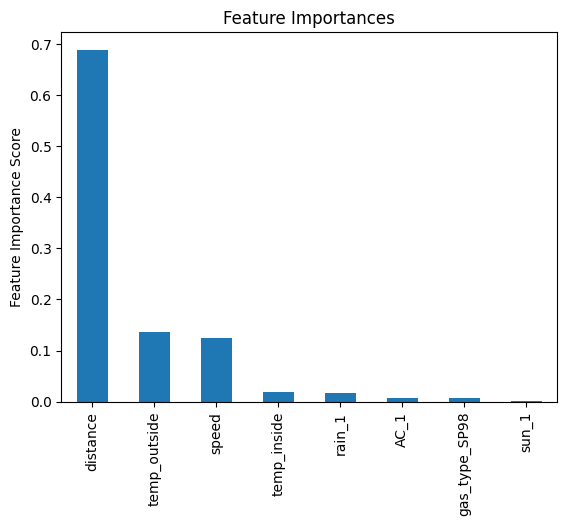

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


    # Fit the algorithm on the data
rf1.fit(x_train, y_train)

print(rf1)

    # Predict training set
y_train_pred = rf1.predict(x_train)
y_test_pred = rf1.predict(x_test)

    # Print model report
print("\nModel Report")

print("Mean Squared Error (MSE train):", mean_squared_error(y_train, y_train_pred))
print("Mean Squared Error (MSE test):", mean_squared_error(y_test, y_test_pred))

print("Root Mean Squared Error (RMSE train):", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Root Mean Squared Error (RMSE test):", np.sqrt(mean_squared_error(y_test, y_test_pred)))

print("Mean Absolute Error (MAE train):", mean_absolute_error(y_train, y_train_pred))
print("Mean Absolute Error (MAE test):", mean_absolute_error(y_test, y_test_pred))

print("R-squared value train:", r2_score(y_train, y_train_pred))
print("R-squared value test:", r2_score(y_test, y_test_pred))

feat_imp = pd.Series(rf1.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
print(rf1.feature_importances_)

# Assuming xgb1 is your XGBoost regressor and 'train' is your training dataset


**predicting values from optimal model**

In [ ]:
rf1.predict(x_test.iloc[50].values.reshape(1, -1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([4.63863654])

In [ ]:
y_test.iloc[50]

consume    4.8
Name: 50, dtype: float64

**n_estimator tuning in Random forest**

In [ ]:
from sklearn.model_selection import GridSearchCV
param_test1 = {
    'n_estimators':np.arange(100,200,5),
    'max_depth':np.arange(15,30,2)
}

rf2 = RandomForestRegressor()
rsearch1 = GridSearchCV(estimator = rf2,param_grid = param_test1, n_jobs=4,cv=5)

rsearch1.fit(x_train,y_train)
rsearch1.cv_results_, rsearch1.best_params_, rsearch1.best_score_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


({'mean_fit_time': array([1.48799367, 1.55561695, 1.10516953, 1.08110766, 1.15402017,
         1.19093976, 1.25120826, 1.17153664, 1.73087502, 1.85341144,
         0.945648  , 1.00524597, 1.02872677, 1.40223908, 1.44141574,
         1.10596514, 1.69573865, 1.65272751, 1.24532347, 1.27118888,
         1.01185713, 1.12022057, 1.20226717, 1.62301002, 2.08414507,
         1.52209997, 1.19608355, 1.36641088, 1.47006497, 1.67229347,
         1.56765671, 1.87949381, 1.15145879, 1.11363707, 1.23824086,
         1.33379521, 1.41399293, 2.42494497, 1.68936806, 1.02258821,
         0.73253083, 0.769067  , 0.79454489, 0.82497106, 0.85739989,
         0.85050659, 0.94072189, 1.52924867, 1.4720449 , 1.04008017,
         0.7268517 , 0.78818202, 0.78661237, 0.83877325, 0.84569755,
         0.86719303, 0.9465414 , 1.2626545 , 1.64610481, 1.12640977,
         0.71067038, 0.74931817, 0.78622084, 0.81941895, 0.86675854,
         0.87885594, 0.91338234, 1.0038413 , 1.55202889, 1.48232417,
         0.715718

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Define your RandomForestClassifier
rf = RandomForestRegressor()

# Define the parameter grid
param_dist_rf={
    'n_estimators':np.arange(10,30,5),
    'max_features':['auto','sqrt',0.3],  # removed quotes from 0.3
    'max_depth':[10,15,20],
    'min_samples_split':np.arange(5,10,1),
    'max_leaf_nodes':np.arange(40,45,1),
    'max_samples': np.arange(180,185,1),
    'min_samples_leaf':np.arange(1,5,1),
    'bootstrap':[True]
}

# Perform GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_dist_rf, cv=5, n_jobs=-1)
grid_search_rf.fit(x_train, y_train)  # Assuming you have defined X_train and y_train

# Print best parameters and best score
print("Best Parameters:", grid_search_rf.best_params_)
print("Best Score:", grid_search_rf.best_score_)


KeyboardInterrupt: 

**Best Model**

In [ ]:
x_train1 = train[['distance', 'speed', 'temp_inside', 'temp_outside', 'AC_1', 'rain_1']]
y_train1 = train[['consume']]

x_test1 = test[['distance', 'speed', 'temp_inside', 'temp_outside', 'AC_1', 'rain_1']]
y_test1 = test[['consume']]

In [ ]:
rf1 = RandomForestRegressor(
    max_features='auto',
    n_estimators=20,
    max_depth=15,
    min_samples_split=7,
    max_leaf_nodes=41,
    max_samples=116,
    min_samples_leaf=1,
    bootstrap=True,
    random_state=27)

<ipython-input-11-82203a7e63f2>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train1, y_train1)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_depth=15, max_features='auto', max_leaf_nodes=41,
                      max_samples=116, min_samples_split=7, n_estimators=20,
                      random_state=27)

Model Report
Mean Squared Error (MSE train): 0.26710857266501825
Mean Squared Error (MSE test): 0.37852528651822015
Root Mean Squared Error (RMSE train): 0.5168254760216627
Root Mean Squared Error (RMSE test): 0.6152440869429142
Mean Absolute Error (MAE train): 0.3380361042144131
Mean Absolute Error (MAE test): 0.4136341991341992
R-squared value train: 0.7866636888602087
R-squared value test: 0.38241915568674123
[0.71755488 0.08843399 0.0196776  0.15032821 0.01040477 0.01360055]


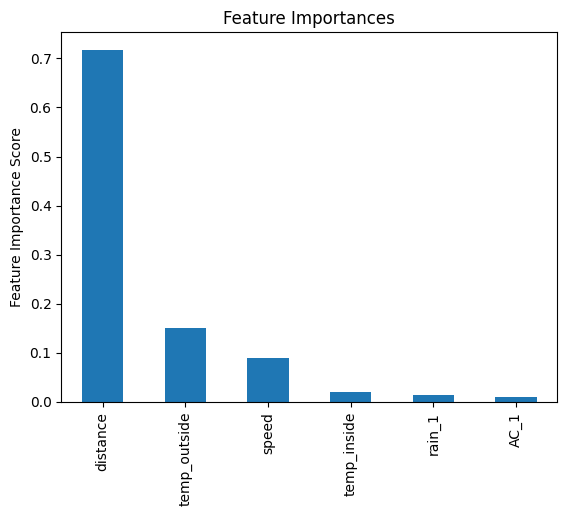

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



    # Fit the algorithm on the data
rf1.fit(x_train1, y_train1)

print(rf1)

    # Predict training set
y_train_pred1 = rf1.predict(x_train1)
y_test_pred1 = rf1.predict(x_test1)

    # Print model report
print("\nModel Report")

print("Mean Squared Error (MSE train):", mean_squared_error(y_train1, y_train_pred1))
print("Mean Squared Error (MSE test):", mean_squared_error(y_test1, y_test_pred1))

print("Root Mean Squared Error (RMSE train):", np.sqrt(mean_squared_error(y_train1, y_train_pred1)))
print("Root Mean Squared Error (RMSE test):", np.sqrt(mean_squared_error(y_test1, y_test_pred1)))

print("Mean Absolute Error (MAE train):", mean_absolute_error(y_train1, y_train_pred1))
print("Mean Absolute Error (MAE test):", mean_absolute_error(y_test1, y_test_pred1))

print("R-squared value train:", r2_score(y_train1, y_train_pred1))
print("R-squared value test:", r2_score(y_test1, y_test_pred1))

feat_imp = pd.Series(rf1.feature_importances_, index=x_train1.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
print(rf1.feature_importances_)


In [ ]:
import pickle

# Save the model and feature names to a dictionary
model_data = {
    "model": rf1,
    "feature_names": ['distance', 'speed', 'temp_inside', 'temp_outside', 'AC_1', 'rain_1']
}

# Save the dictionary to a file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model_data, file)

# Load the model and feature names from the pickle file
with open('random_forest_model.pkl', 'rb') as file:
    loaded_model_data = pickle.load(file)

# Access the loaded model and feature names
regressor_loaded = loaded_model_data["model"]
feature_names = loaded_model_data["feature_names"]

# Now you can use the loaded model and feature names as needed


In [ ]:
import os

# Get the directory of a specific file
file_path = 'app.py'
directory = os.path.dirname(file_path)

print("Directory of the file:", directory)


Directory of the file: 


**Partial dependency plot**

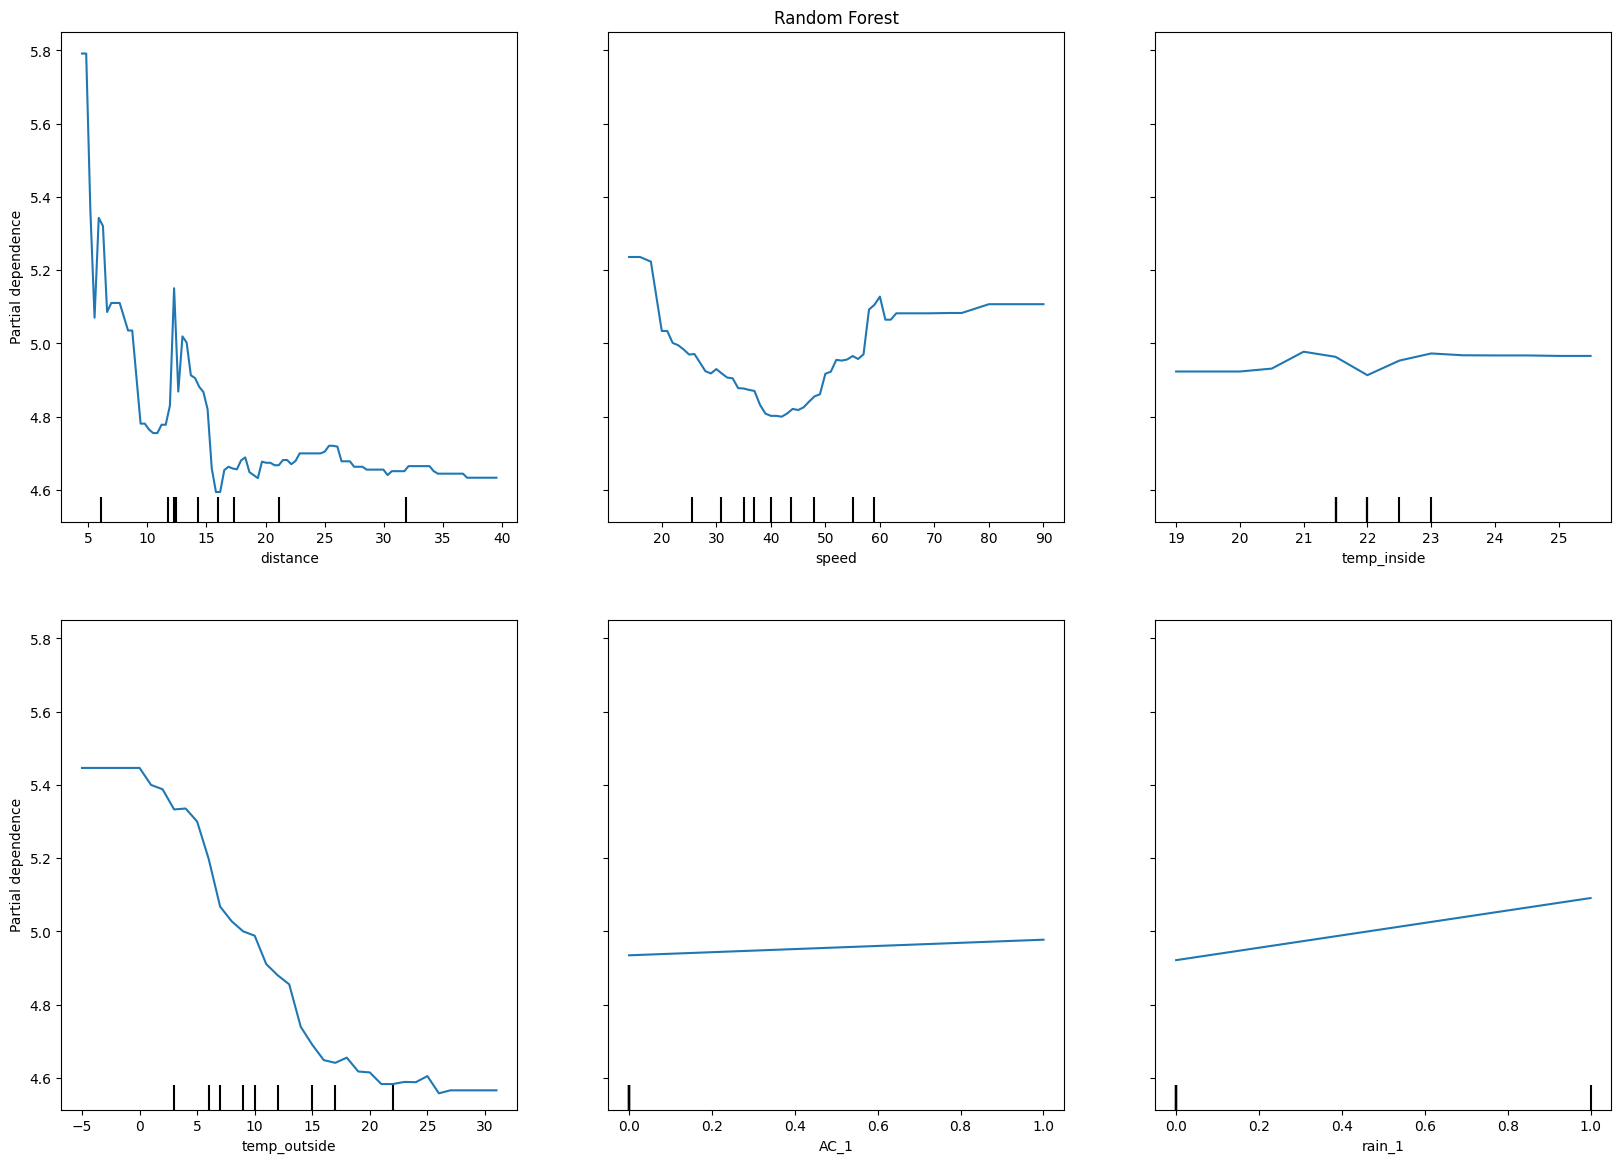

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

features=[0,1,2,3,4,5]
fig,ax = plt.subplots(figsize=(20,14))
ax.set_title("Random Forest")
PartialDependenceDisplay.from_estimator(rf1,x_train1,features,target=y_train1,ax=ax)

**GRNN**

In [ ]:
import numpy as np

class GRNN:
    def __init__(self, sigma=1.0):
        self.sigma = sigma

    def gaussian_kernel(self, x, xi):
        return np.exp(-np.sum((x - xi) ** 2) / (2 * self.sigma ** 2))

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []
        for x_test in X_test:
            total_weighted_sum = 0
            total_weights = 0
            for xi, yi in zip(self.X_train, self.y_train):
                kernel_value = self.gaussian_kernel(x_test, xi)
                total_weighted_sum += kernel_value * yi
                total_weights += kernel_value
            predictions.append(total_weighted_sum / total_weights)
        return np.array(predictions)

def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Assuming you have loaded your training and testing data into x_train, y_train, x_test, and y_test

# Create and train GRNN model
grnn = GRNN(sigma=0.8)
grnn.fit(x_train.values, y_train.values)

# Predict on training and testing data
y_train_pred = grnn.predict(x_train.values)
y_test_pred = grnn.predict(x_test.values)

# Calculate Mean Squared Error
train_mse = calculate_mse(y_train.values, y_train_pred)
test_mse = calculate_mse(y_test.values, y_test_pred)

print("Training MSE:", train_mse)
print("Test MSE:", test_mse)

Training MSE: 0.010058983846970222
Test MSE: 0.6879024876265031


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
# Calculate Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Calculate Mean Absolute Error (MAE)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate R-squared value
r_squared_train = r2_score(y_train, y_train_pred)
r_squared_test = r2_score(y_test, y_test_pred)


print("Mean Squared Error (MSE train):", mse_train)
print("Mean Squared Error (MSE test):", mse_test)

print("Root Mean Squared Error (RMSE train):", rmse_train)
print("Root Mean Squared Error (RMSE test):", rmse_test)

print("Mean Absolute Error (MAE train):", mae_train)
print("Mean Absolute Error (MAE test):", mae_test)

print("R-squared value train:", r_squared_train)
print("R-squared value test:", r_squared_test)

Mean Squared Error (MSE train): 0.010058983846970222
Mean Squared Error (MSE test): 0.6879024876265031
Root Mean Squared Error (RMSE train): 0.10029448562593171
Root Mean Squared Error (RMSE test): 0.8293988712474253
Mean Absolute Error (MAE train): 0.03813850617284401
Mean Absolute Error (MAE test): 0.5482375965578603
R-squared value train: 0.9919660140956291
R-squared value test: -0.1223435111068003


In [ ]:
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.model_selection import GridSearchCV
class GRNN(BaseEstimator, RegressorMixin):
    def __init__(self, std=0.1):
        self.std = std
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = np.zeros(len(X))
        for i, x in enumerate(X):
            y_pred[i] = np.sum(self.y_train * np.exp(-np.sum((self.X_train - x) ** 2, axis=1) / (2 * self.std ** 2))) / np.sum(np.exp(-np.sum((self.X_train - x) ** 2, axis=1) / (2 * self.std ** 2)))
        return y_pred

def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Assuming you have loaded your training and testing data into x_train, y_train, x_test, and y_test

# Create and train GRNN model
grnn = GRNN()

# Define the range of sigma values to search
param_grid = {
    'std': [0.1, 0.2, 0.5, 1.0, 2.0]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=grnn, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

# Get the best sigma value
best_sigma = grid_search.best_params_['std']

print("Best sigma:", best_sigma)

# Set the best sigma value to the GRNN model
grnn = GRNN(std=best_sigma)

# Train the model with the best sigma value
grnn.fit(x_train, y_train)

# Predict on training and testing data
y_train_pred = grnn.predict(x_train.values)
y_test_pred = grnn.predict(x_test.values)

# Calculate Mean Squared Error
train_mse = calculate_mse(y_train.values, y_train_pred)
test_mse = calculate_mse(y_test.values, y_test_pred)

print("Training MSE:", train_mse)
print("Test MSE:", test_mse)